#MNIST Dataset classification

## Import dependencies and libraries

In [ ]:
#Import relevant libraries
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Prepare the data

In [ ]:
from torchvision.datasets import MNIST

In [ ]:
train_data = torchvision.datasets.MNIST(root = "data",
                                              download = True,
                                              train = True,
                                              target_transform=None,
                                              transform=torchvision.transforms.ToTensor(),
                                              )

100%|██████████| 9.91M/9.91M [00:00<00:00, 145MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 33.7MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 85.6MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.38MB/s]


In [ ]:
test_data = torchvision.datasets.MNIST(root="data",
                                             train = False,
                                             download = True,
                                             target_transform=None,
                                             transform=torchvision.transforms.ToTensor())

In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
image, label = train_data[0]

## Visualize the data

(-0.5, 27.5, 27.5, -0.5)

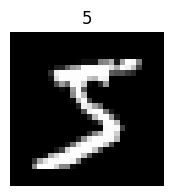

In [ ]:
plt.figure(figsize=(2,2))
plt.imshow(image.squeeze(), cmap="gray")
plt.title(label)
plt.axis(False)

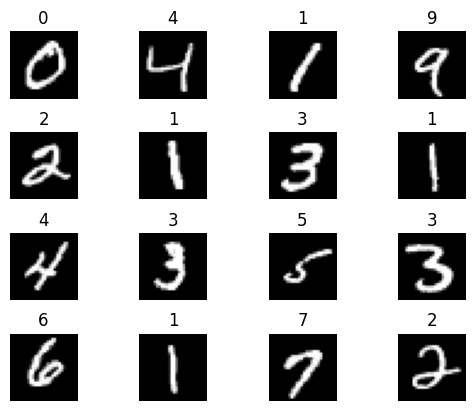

In [ ]:
rows, cols = 4,4
for i in range(1, rows * cols +1):
  img, label = train_data[i]
  plt.subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(label)
  plt.axis(False)
  plt.subplots_adjust(hspace=0.5)

## Divide the data into batches

In [ ]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                        batch_size=BATCH_SIZE,
                        shuffle= True)
test_dataloader = DataLoader(dataset=test_data,
                       batch_size=BATCH_SIZE,
                       shuffle = False)

len(train_dataloader), len(test_dataloader)

(1875, 313)

In [ ]:
#Visualize the shapes of the data after making batches
print(f"Length of the train_data:{len(train_dataloader)}")
print(f"Length of the test_data:{len(test_dataloader)}")

Length of the train_data:1875
Length of the test_data:313


In [ ]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))

In [ ]:
train_features_batch.shape

torch.Size([32, 1, 28, 28])

(-0.5, 27.5, 27.5, -0.5)

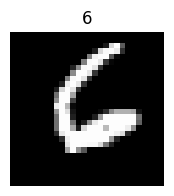

In [ ]:
plt.figure(figsize=(2,2))
plt.imshow(train_features_batch[0].squeeze(), cmap= "gray")
plt.title(train_labels_batch[0].item())
plt.axis(False)

## Build a baseline model

This model is flat model without CNN and non linear activations

In [ ]:
train_dataloader.dataset.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [ ]:
import requests
request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
with open("helper_functions.py", "wb") as f:
  f.write(request.content)
from helper_functions import accuracy_fn

In [ ]:
class MNISTModelV0(nn.Module):
  def __init__(self,input_shape, output_shape, hidden_units):
    super().__init__()
    self.linear_layer = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
        )
  def forward(self,x):
    return self.linear_layer(x)

In [ ]:
model_0 = MNISTModelV0(input_shape=784,
                       hidden_units=10,
                       output_shape=len(train_dataloader.dataset.classes))
model_0

MNISTModelV0(
  (linear_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

## Create a loss function and optimizer


In [ ]:
# Create loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr =0.1)

## Build the training and testing loop

In [ ]:
torch.manual_seed(42)
epochs =3
for epoch in range(epochs):
  print(f"Epoch: {epoch}.....")
  train_loss = 0
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()
    y_pred = model_0(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 400 == 0:
      print(f"looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples....")
  train_loss /= len(train_dataloader)
  test_loss = 0
  test_acc = 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      test_pred = model_0(X_test)
      test_loss += loss_fn(test_pred, y_test)
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)
  print(f"Train Loss:{train_loss:.4f} | Test Loss:{test_loss:.4f} | Test Accuracy:{test_acc:.2f}%")


Epoch: 0.....
looked at 0/60000 samples....
looked at 12800/60000 samples....
looked at 25600/60000 samples....
looked at 38400/60000 samples....
looked at 51200/60000 samples....
Train Loss:0.4110 | Test Loss:0.2958 | Test Accuracy:91.58%
Epoch: 1.....
looked at 0/60000 samples....
looked at 12800/60000 samples....
looked at 25600/60000 samples....
looked at 38400/60000 samples....
looked at 51200/60000 samples....
Train Loss:0.3086 | Test Loss:0.2869 | Test Accuracy:91.88%
Epoch: 2.....
looked at 0/60000 samples....
looked at 12800/60000 samples....
looked at 25600/60000 samples....
looked at 38400/60000 samples....
looked at 51200/60000 samples....
Train Loss:0.2959 | Test Loss:0.2867 | Test Accuracy:91.94%


In [ ]:
def eval_model(model,
               data_loader,
               loss_fn,
               accuracy_fn):
  model.eval()
  loss = 0
  acc = 0
  with torch.inference_mode():
        for X, y in data_loader:
            # Make predictions with the model
            y_pred = model(X)

            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                                y_pred=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)

        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, # only works when model was created with a class
          "model_loss": loss.item(),
          "model_acc": acc}

In [ ]:
model_0_results = eval_model(model = model_0,
                            data_loader=test_dataloader,
                            loss_fn = loss_fn,
                            accuracy_fn=accuracy_fn)

In [ ]:
model_0_results

{'model_name': 'MNISTModelV0',
 'model_loss': 0.2866969108581543,
 'model_acc': 91.94289137380191}

## Functionizing the training and test modes

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn):
  train_loss = 0
  train_acc = 0
  for batch, (X,y) in enumerate(data_loader):
    model.train()
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y, y_pred.argmax(dim = 1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")


In [ ]:
def test_step(model, data_loader, loss_fn,accuracy_fn):
  test_loss = 0
  test_acc = 0
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      y_pred = model(X)
      loss = loss_fn(y_pred, y)
      test_loss += loss
      test_acc += accuracy_fn(y, y_pred.argmax(dim = 1))
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
  print(f"Test Loss:{test_loss:.4f} | Test Accuracy:{test_acc:.2f}%")

In [ ]:
torch.manual_seed(42)
epochs = 3
for epoch in range(epochs):
  print(f"Epoch: {epoch}....")
  train_step(model= model_0,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn)
  test_step(model = model_0,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn)

Epoch: 0....
Train loss: 0.28959 | Train accuracy: 91.90%
Test Loss:0.2787 | Test Accuracy:91.99%
Epoch: 1....
Train loss: 0.28495 | Train accuracy: 91.96%
Test Loss:0.2785 | Test Accuracy:92.30%
Epoch: 2....
Train loss: 0.28138 | Train accuracy: 92.10%
Test Loss:0.2803 | Test Accuracy:92.11%


In [ ]:
def make_predictions(model: torch.nn.Module, data: list):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0) # Add an extra dimension and send sample to device

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 1, so can perform on dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob)

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [ ]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]}")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 2


In [ ]:
# Make predictions on test samples with model 2
pred_probs= make_predictions(model=model_0,
                             data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]

tensor([[2.5700e-07, 4.3303e-05, 9.9162e-01, 7.1301e-04, 3.7838e-08, 4.0430e-06,
         1.4605e-06, 1.0116e-08, 7.6212e-03, 3.4577e-08],
        [1.2628e-09, 9.8928e-01, 7.5365e-04, 4.3487e-03, 6.0374e-07, 2.5585e-04,
         4.7651e-05, 7.1368e-06, 5.1909e-03, 1.1811e-04]])

In [ ]:
# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([2, 1, 2, 4, 6, 6, 4, 9, 1])

In [ ]:
# Are our predictions in the same form as our test labels?
test_labels, pred_classes

([2, 1, 2, 4, 6, 6, 4, 9, 1], tensor([2, 1, 2, 4, 6, 6, 4, 9, 1]))

## Visualizing the predictions

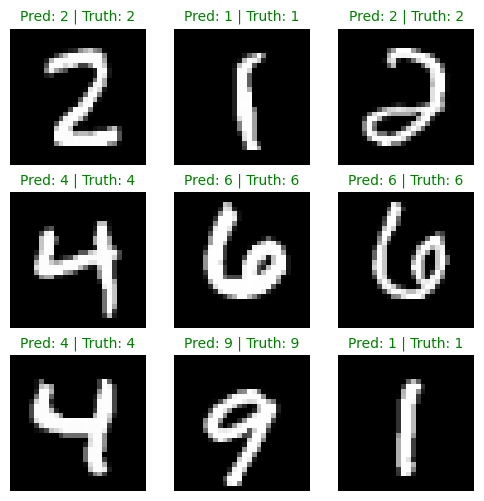

In [ ]:
# Plot predictions
plt.figure(figsize=(6, 6))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = pred_classes[i]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = test_labels[i]

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

## Model 1: Adding non linear activations to the model

In [ ]:
class MNISTModelV1(nn.Module):
  def __init__(self, input_shape, output_shape, hidden_units):
    super().__init__()
    self.linear_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape),
        nn.ReLU()
    )
  def forward(self,x):
    return self.linear_stack(x)

In [ ]:
len(train_data.class_to_idx)

10

In [ ]:
model_1 = MNISTModelV1(input_shape=784, output_shape=len(train_data.classes), hidden_units=10)
model_1

MNISTModelV1(
  (linear_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

## Create the loss function and optimizer for the model 1

In [ ]:
# create loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr = 0.01)

## Build the training and testing loop

In [ ]:
torch.manual_seed(42)
epochs = 3
for epoch in range(epochs):
  print(f"Epoch :{epoch}")
  train_step(model= model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer = optimizer,
             accuracy_fn=accuracy_fn)
  test_step(model = model_1,
            data_loader = test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn=accuracy_fn)

Epoch :0
Train loss: 1.63676 | Train accuracy: 49.06%
Test Loss:1.2868 | Test Accuracy:62.07%
Epoch :1
Train loss: 1.23219 | Train accuracy: 62.98%
Test Loss:1.1719 | Test Accuracy:64.88%
Epoch :2
Train loss: 1.06707 | Train accuracy: 68.11%
Test Loss:0.9604 | Test Accuracy:73.27%


In [ ]:
model_1_results = eval_model(model = model_1, data_loader=test_dataloader,loss_fn = loss_fn, accuracy_fn=accuracy_fn)
model_1_results

{'model_name': 'MNISTModelV1',
 'model_loss': 0.9603655338287354,
 'model_acc': 73.27276357827476}

## Model 2: Now we introduce the CNN

In [ ]:
class MNISTModelV2(nn.Module):
  def __init__(self, input_shape, hidden_units, output_shape):
    super().__init__()
    self.convo_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size= 3,
                  stride= 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride =1,
                  padding =1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride = 2)
    )
    self.convo_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride =1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier_layer = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )
  def forward(self,x):
    x = self.convo_block_1(x)
    # print(f"Output shape of the convo_block_1:{x.shape}")
    x = self.convo_block_2(x)
    # print(f"Output shape of the convo_block_2:{x.shape}")
    x = self.classifier_layer(x)
    # print(f"Output shape of the classifier:{x.shape}")
    return x

In [ ]:
model_2 = MNISTModelV2(input_shape = 1, hidden_units=10, output_shape=len(train_data.classes))
model_2

MNISTModelV2(
  (convo_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (convo_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
test_dataloader

In [ ]:
len(test_dataloader)

313

In [ ]:
test_features_batch, test_labels_batch = next(iter(test_dataloader))
test_features_batch.shape

torch.Size([32, 1, 28, 28])

In [ ]:
image_test = torch.rand(1,28,28)

In [ ]:
image_test.shape

torch.Size([1, 28, 28])

In [ ]:
model_2(image_test.unsqueeze(0))

tensor([[-0.0262, -0.0276, -0.0150,  0.0068,  0.0621,  0.0198, -0.0531,  0.0659,
         -0.0439, -0.0201]], grad_fn=<AddmmBackward0>)

## Create loss function and optimizer

In [ ]:
# Create loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(),
                            lr = 0.1)

## Build the training and testing loop for Model 2

In [ ]:
torch.manual_seed(42)
epochs = 3
for epoch in range(epochs):
  print(f"Epoch: {epoch}")
  train_step(model = model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             optimizer=optimizer)
  test_step(model =model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn)

Epoch: 0
Train loss: 0.28348 | Train accuracy: 90.41%
Test Loss:0.0621 | Test Accuracy:98.09%
Epoch: 1
Train loss: 0.06683 | Train accuracy: 97.83%
Test Loss:0.0448 | Test Accuracy:98.50%
Epoch: 2
Train loss: 0.05219 | Train accuracy: 98.39%
Test Loss:0.0461 | Test Accuracy:98.57%


In [ ]:
model_2_results = eval_model(model = model_2,
                            data_loader=test_dataloader,
                            loss_fn = loss_fn,
                            accuracy_fn = accuracy_fn)

In [ ]:
model_2_results

{'model_name': 'MNISTModelV2',
 'model_loss': 0.04612262174487114,
 'model_acc': 98.57228434504792}

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame([model_0_results, model_1_results, model_2_results])

In [ ]:
df

,model_name,model_loss,model_acc
0,MNISTModelV0,0.286697,91.942891
1,MNISTModelV1,0.960366,73.272764
2,MNISTModelV2,0.046123,98.572284


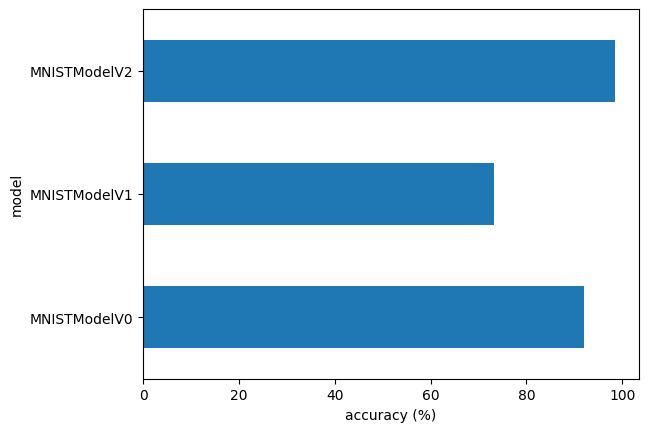

In [ ]:
df.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 32, so can perform on dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred)
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [ ]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 931.7/931.7 kB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 56.7 MB/s eta 0:00:00
mlxtend version: 0.23.4


In [ ]:
# Import mlxtend upgraded version
import mlxtend
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

0.23.4


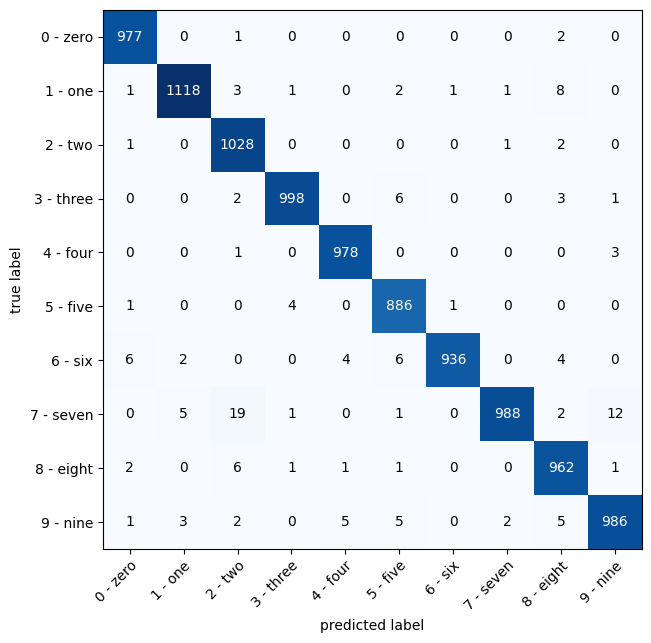

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(train_data.class_to_idx), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy
    class_names=train_data.classes, # turn the row and column labels into class names
    figsize=(10, 7)
);